In [29]:
import csv

In [30]:
with open("neighbors-states.csv") as csvfile:
    neighbours = csv.reader(csvfile)    
    neighbourpaircodes = [pair for pair in neighbours][1:]
    
print(neighbourpaircodes[0:10])

[['AK', 'WA'], ['AL', 'FL'], ['AL', 'GA'], ['AL', 'MS'], ['AL', 'TN'], ['AR', 'LA'], ['AR', 'MO'], ['AR', 'MS'], ['AR', 'OK'], ['AR', 'TN']]


In [50]:
with open("states.csv") as csvfile:
    s = csv.reader(csvfile)
    statenames = {state[0]: state[1] for state in list(s)[1:]}
print(statenames)

{'MI': 'Michigan', 'AL': 'Alabama', 'NE': 'Nebraska', 'IL': 'Illinois', 'MD': 'Maryland', 'MS': 'Mississippi', 'NM': 'New Mexico', 'FL': 'Florida', 'WY': 'Wyoming', 'ND': 'North Dakota', 'OH': 'Ohio', 'CT': 'Connecticut', 'WI': 'Wisconsin', 'SC': 'South Carolina', 'WV': 'West Virginia', 'NC': 'North Carolina', 'NJ': 'New Jersey', 'NH': 'New Hampshire', 'GA': 'Georgia', 'OR': 'Oregon', 'RI': 'Rhode Island', 'CO': 'Colorado', 'MT': 'Montana', 'AK': 'Alaska', 'LA': 'Louisiana', 'HI': 'Hawaii', 'KY': 'Kentucky', 'SD': 'South Dakota', 'ME': 'Maine', 'UT': 'Utah', 'NY': 'New York', 'IA': 'Iowa', 'PA': 'Pennsylvania', 'MN': 'Minnesota', 'TN': 'Tennessee', 'NV': 'Nevada', 'VT': 'Vermont', 'WA': 'Washington', 'AZ': 'Arizona', 'DE': 'Delaware', 'CA': 'California', 'OK': 'Oklahoma', 'KS': 'Kansas', 'IN': 'Indiana', 'ID': 'Idaho', 'TX': 'Texas', 'MO': 'Missouri', 'DC': 'District of Columbia', 'VA': 'Virginia', 'MA': 'Massachusetts', 'AR': 'Arkansas'}


In [51]:
neighbourpairs = [(statenames[i],statenames[j]) for i,j in neighbourpaircodes]
neighbourpairs[:9]

[('Alaska', 'Washington'),
 ('Alabama', 'Florida'),
 ('Alabama', 'Georgia'),
 ('Alabama', 'Mississippi'),
 ('Alabama', 'Tennessee'),
 ('Arkansas', 'Louisiana'),
 ('Arkansas', 'Missouri'),
 ('Arkansas', 'Mississippi'),
 ('Arkansas', 'Oklahoma')]

In [52]:
print(statenames)

{'MI': 'Michigan', 'AL': 'Alabama', 'NE': 'Nebraska', 'IL': 'Illinois', 'MD': 'Maryland', 'MS': 'Mississippi', 'NM': 'New Mexico', 'FL': 'Florida', 'WY': 'Wyoming', 'ND': 'North Dakota', 'OH': 'Ohio', 'CT': 'Connecticut', 'WI': 'Wisconsin', 'SC': 'South Carolina', 'WV': 'West Virginia', 'NC': 'North Carolina', 'NJ': 'New Jersey', 'NH': 'New Hampshire', 'GA': 'Georgia', 'OR': 'Oregon', 'RI': 'Rhode Island', 'CO': 'Colorado', 'MT': 'Montana', 'AK': 'Alaska', 'LA': 'Louisiana', 'HI': 'Hawaii', 'KY': 'Kentucky', 'SD': 'South Dakota', 'ME': 'Maine', 'UT': 'Utah', 'NY': 'New York', 'IA': 'Iowa', 'PA': 'Pennsylvania', 'MN': 'Minnesota', 'TN': 'Tennessee', 'NV': 'Nevada', 'VT': 'Vermont', 'WA': 'Washington', 'AZ': 'Arizona', 'DE': 'Delaware', 'CA': 'California', 'OK': 'Oklahoma', 'KS': 'Kansas', 'IN': 'Indiana', 'ID': 'Idaho', 'TX': 'Texas', 'MO': 'Missouri', 'DC': 'District of Columbia', 'VA': 'Virginia', 'MA': 'Massachusetts', 'AR': 'Arkansas'}


In [53]:
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
USA = nx.Graph()
USA.add_nodes_from(statenames.values())
USA.add_edges_from(neighbourpairs)

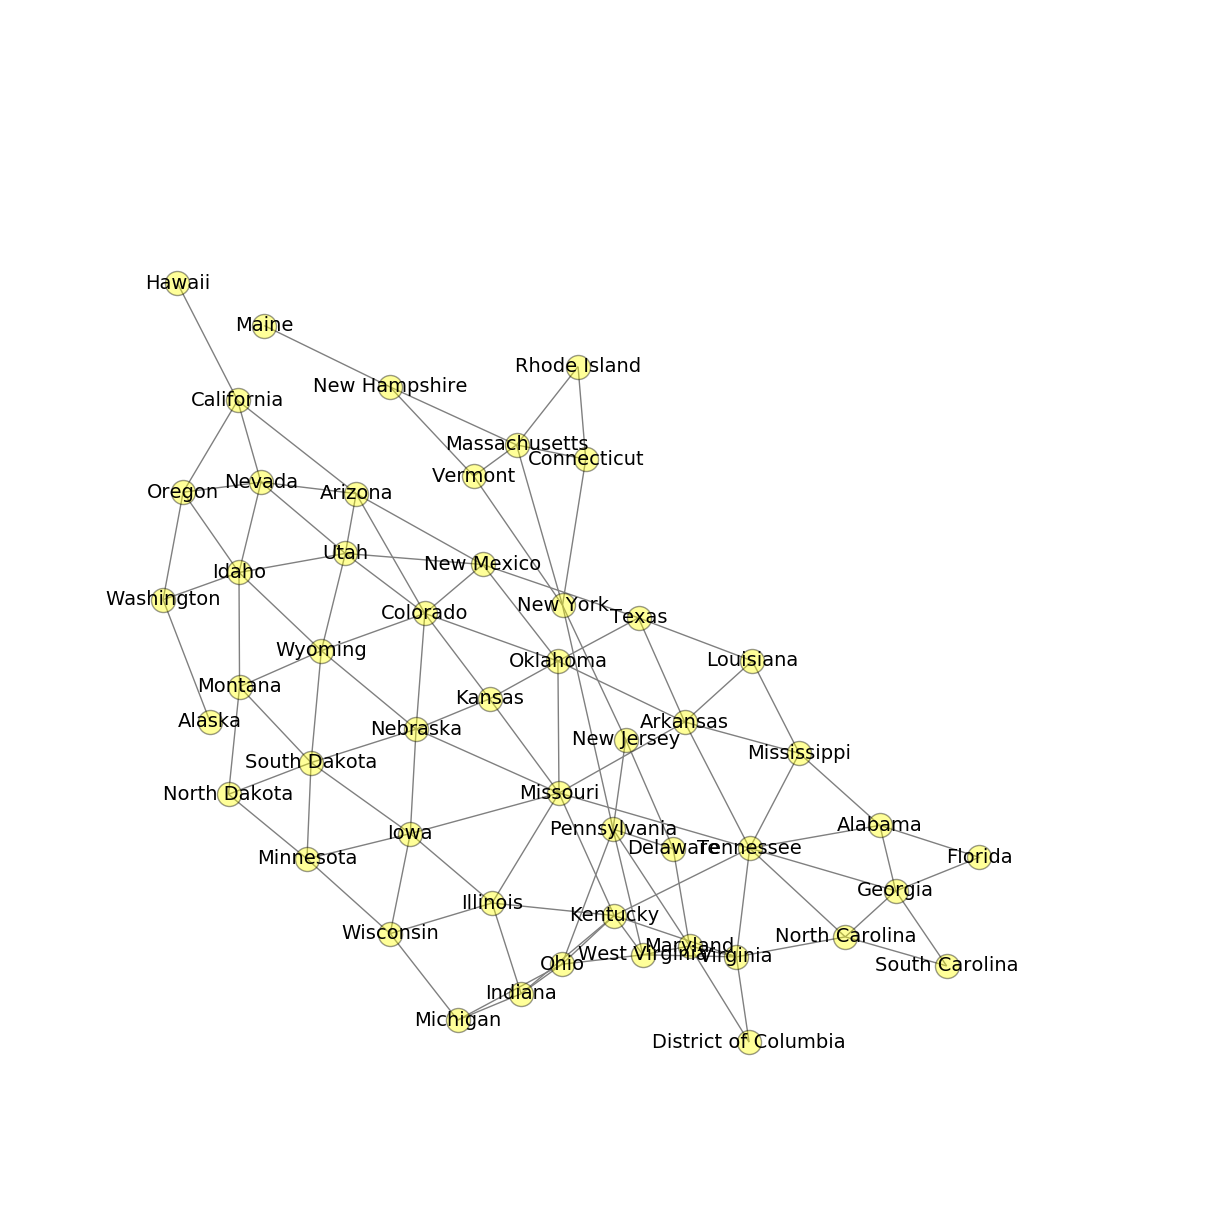

In [81]:
nx.spring_layout(USA)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(USA)
nx.draw_networkx_nodes(USA, pos, 
                        nodelist=USA.nodes(),
                        node_color="yellow",
                        alpha=0.4)
nx.draw_networkx_labels(USA, pos, 
                        nodelist=USA.nodes(), 
                        font_size=14)
nx.draw_networkx_edges(USA, pos, 
                        edgelist=USA.edges(),
                        edge_color="grey")
plt.axis('off')
plt.show()